# Intelligent Crop Recommendation System

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Crop Production dataset

In [2]:
df = pd.read_csv('crop_production.csv')

In [3]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
df.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88.0


In [6]:
df.shape

(246091, 7)

In [7]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

### Removing null values

In [8]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [15]:
null_percentage = (df.isnull().sum()['Production'] / df.shape[0]) * 100
print(null_percentage, end='%')

1.5156994770227274%

In [18]:
df.dropna(subset=['Production'], axis='rows', inplace=True)

In [19]:
df.shape

(242361, 7)

In [20]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

### Checking for correlation

<AxesSubplot:>

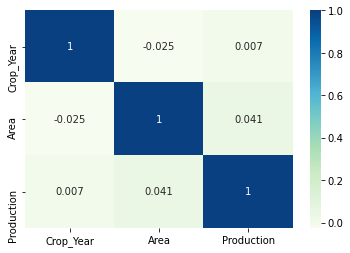

In [30]:
sns.heatmap(df.corr(), cmap="GnBu", annot=True)

No highly correlated values

In [31]:
df['State_Name'].value_counts()

Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Jharkhand                       1266
Manipur                         1266
Mizoram                          954
P

In [36]:
df['State_Name'].nunique()

33

In [32]:
df['District_Name'].value_counts()

TUMKUR       931
BELGAUM      924
BIJAPUR      905
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
RAMGARH        6
KHUNTI         6
NAMSAI         1
MUMBAI         1
Name: District_Name, Length: 646, dtype: int64

In [35]:
df['District_Name'].nunique()

646

In [39]:
print("Year Range:", df['Crop_Year'].min(), "-", df['Crop_Year'].max())
print(df['Crop_Year'].value_counts())

Year Range: 1997 - 2015
2003    17139
2002    16536
2007    14269
2008    14230
2006    13976
2004    13858
2010    13793
2011    13791
2009    13767
2000    13553
2005    13519
2013    13475
2001    13293
2012    13184
1999    12441
1998    11262
2014    10815
1997     8899
2015      561
Name: Crop_Year, dtype: int64


In [42]:
print("Unique Crops:", df['Crop'].nunique())
df['Crop'].unique()

Unique Crops: 124


array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garl

### Removing the empty spaces

In [43]:
print("Unique Seasons:", df['Season'].nunique())
df['Season'].unique()

Unique Seasons: 6


array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [49]:
df['Season'] = df['Season'].str.strip()
df['Season'].unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

### Overall Statistics of the data

In [54]:
df.describe(include='all')

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
count,242361,242361,242361.000000,242361,242361,2.423610e+05,2.423610e+05
unique,33,646,NaN,6,124,NaN,NaN
top,Uttar Pradesh,TUMKUR,NaN,Kharif,Rice,NaN,NaN
freq,33189,931,NaN,94283,15082,NaN,NaN
mean,NaN,NaN,2005.625773,NaN,NaN,1.216741e+04,5.825034e+05
std,NaN,NaN,4.958285,NaN,NaN,5.085744e+04,1.706581e+07
min,NaN,NaN,1997.000000,NaN,NaN,1.000000e-01,0.000000e+00
25%,NaN,NaN,2002.000000,NaN,NaN,8.700000e+01,8.800000e+01
50%,NaN,NaN,2006.000000,NaN,NaN,6.030000e+02,7.290000e+02
75%,NaN,NaN,2010.000000,NaN,NaN,4.545000e+03,7.023000e+03


### Adding new column

In [88]:
def crop_types(crop):
    if crop in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        return 'Cereal'
    if crop in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        return 'Pulses'
    if crop in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        return 'Fruits'
    if crop in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        return 'Beans'
    if crop in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
        return 'Vegetables'
    if crop in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        return 'spices'
    if crop in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        return 'fibres'
    if crop in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        return 'Nuts'
    if crop in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        return 'oilseeds'
    if crop in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        return 'Commercial'

df['Crop_Type']=df['Crop'].apply(crop_types)

In [89]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Crop_Type
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Nuts
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Cereal
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Fruits
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Nuts


### Visualization

In [106]:
statewise_prod = df.groupby('State_Name').sum().reset_index().sort_values(by='Production', ascending=False)
statewise_prod.head()

,State_Name,Crop_Year,Area,Production
15,Kerala,8028282,3.180225e+07,9.788005e+10
1,Andhra Pradesh,19180467,1.315073e+08,1.732459e+10
27,Tamil Nadu,26596201,9.541695e+07,1.207644e+10
30,Uttar Pradesh,66576513,4.336223e+08,3.234493e+09
3,Assam,29337168,7.037875e+07,2.111752e+09


<AxesSubplot:xlabel='Production', ylabel='State_Name'>

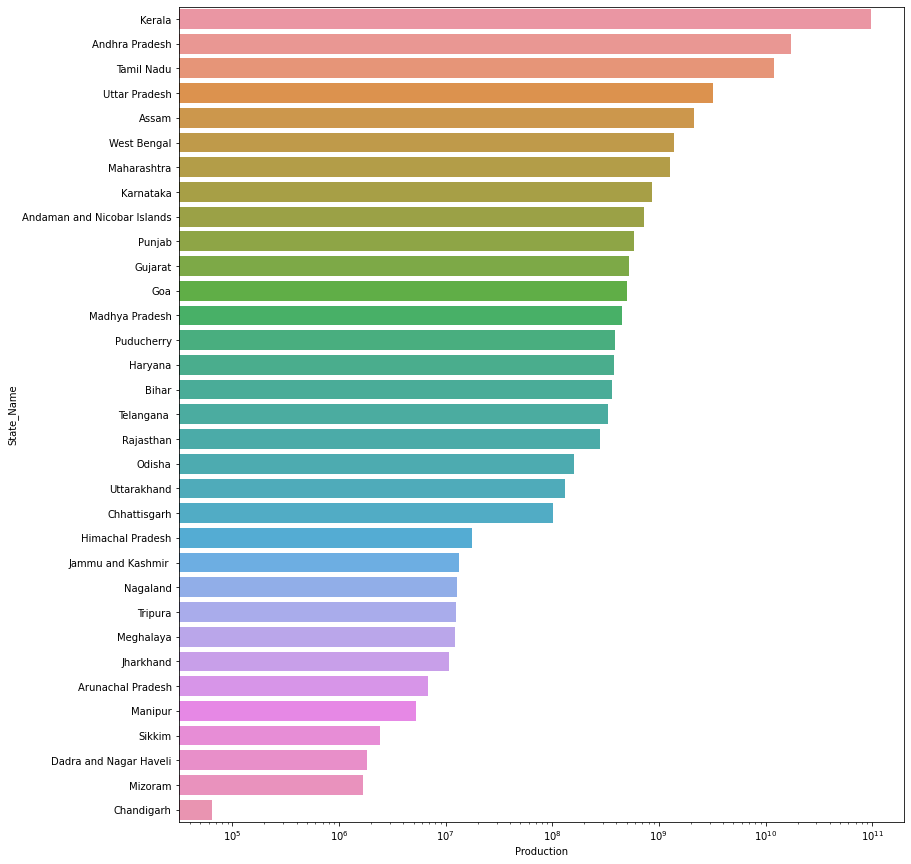

In [117]:
plt.figure(figsize= (13,15))
plt.xscale('log')
sns.barplot(x=statewise_prod['Production'], y=statewise_prod["State_Name"], orient='h')

In [55]:
df['Crop'].value_counts()

Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
                     ...  
Pear                     6
Plums                    6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: Crop, Length: 124, dtype: int64

In [74]:
crop_prod = df.groupby('Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
crop_prod.head(10)

,Crop,Production
28,Coconut,1.299816e+11
106,Sugarcane,5.535682e+09
95,Rice,1.605470e+09
119,Wheat,1.332826e+09
87,Potato,4.248263e+08
33,Cotton(lint),2.970000e+08
59,Maize,2.733418e+08
49,Jute,1.815582e+08
7,Banana,1.461327e+08
105,Soyabean,1.418372e+08


In [75]:
crop_prod.columns

Index(['Crop', 'Production'], dtype='object')

Text(0.5, 1.0, 'Total Crops vs Production')

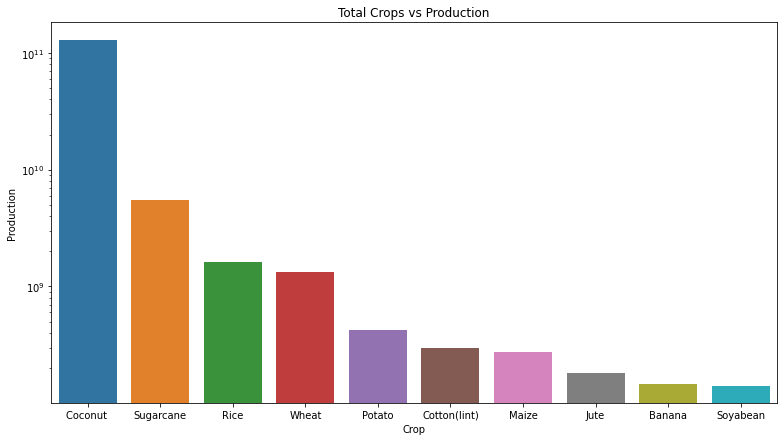

In [93]:
fig, ax = plt.subplots(figsize=(13,7))
sns.barplot(x=crop_prod['Crop'].head(10), y=crop_prod['Production'])
plt.yscale('log')
plt.title('Total Crops vs Production')

Text(0.5, 1.0, 'Crop Types vs Production')

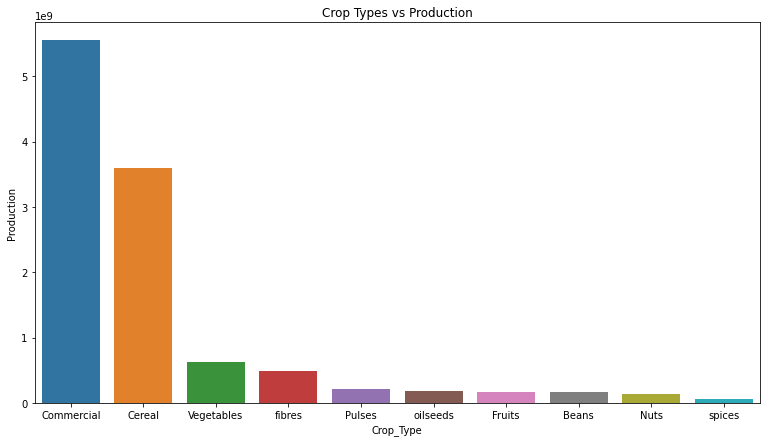

In [121]:
df_crop_type = df.copy()
df_crop_type.head()
df_crop_type = df_crop_type.groupby('Crop_Type')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)

fig, ax = plt.subplots(figsize=(13,7))
sns.barplot(x=df_crop_type['Crop_Type'], y=df_crop_type['Production'])
plt.title('Crop Types vs Production')

Text(0.5, 1.0, 'Seasonal Crops vs Production')

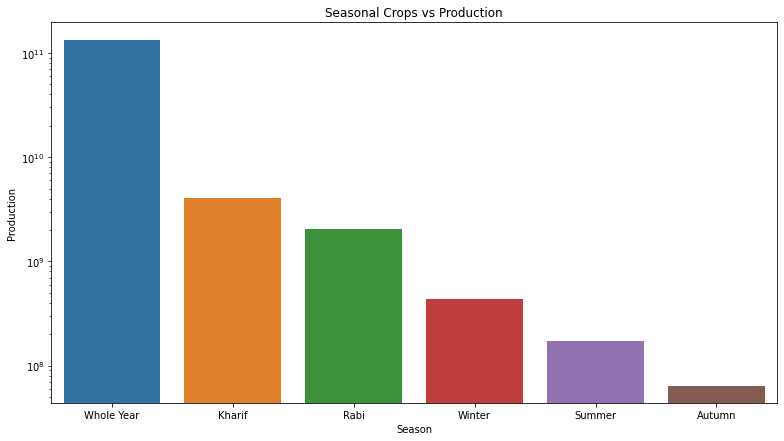

In [119]:
df_season=df.copy()
season = df_season.groupby('Season')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
fig, ax = plt.subplots(figsize=(13,7))
sns.barplot(x=season['Season'].head(10), y=season['Production'].head(10))
plt.yscale('log')
plt.title('Seasonal Crops vs Production')

### Checking for outliers